In [1]:
import sympy as sp
from sympy import cos, sin, tan, Matrix, diff, Function

### Переменные

In [239]:
r, r1, r2 = sp.symbols("r r_1 r_2")
m, m1, m2 = sp.symbols("m m_1 m_2")
x, y, z, t = sp.symbols("x y z t")
phi, theta = sp.symbols("\\varphi \\theta")

In [240]:
G = sp.symbols("G")

In [241]:
x0 = Function("x")(t)
y0 = Function("y")(t)
z0 = Function("z")(t)

### 12.12

In [242]:
r = Function("r")(t)
theta = Function("\\theta")(t)
phi = Function("\\varphi")(t)

In [243]:
x = r * sin(theta) * cos(phi)
y = r * sin(theta) * sin(phi)
z = r * cos(theta)

In [244]:
_r = Matrix([[x], [y], [z]])
_v = diff(_r, t)

In [245]:
T = sp.simplify((_v.T * _v)[0])

In [246]:
T

r(t)**2*sin(\theta(t))**2*Derivative(\varphi(t), t)**2 + r(t)**2*Derivative(\theta(t), t)**2 + Derivative(r(t), t)**2

In [247]:
T = sp.simplify((_v.T * _v)[0])
T = T * m1 * m2 / (m1 + m2) / 2
T = T + (m1+m2)/2*(diff(x0, t)**2+diff(y0, t)**2+diff(z0, t)**2)
T

m_1*m_2*(r(t)**2*sin(\theta(t))**2*Derivative(\varphi(t), t)**2 + r(t)**2*Derivative(\theta(t), t)**2 + Derivative(r(t), t)**2)/(2*(m_1 + m_2)) + (m_1/2 + m_2/2)*(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)

In [248]:
P = -G * m1 * m2 /  r
P

-G*m_1*m_2/r(t)

In [249]:
L = T - P
L

G*m_1*m_2/r(t) + m_1*m_2*(r(t)**2*sin(\theta(t))**2*Derivative(\varphi(t), t)**2 + r(t)**2*Derivative(\theta(t), t)**2 + Derivative(r(t), t)**2)/(2*(m_1 + m_2)) + (m_1/2 + m_2/2)*(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)

In [250]:
sp.simplify(diff(L, diff(phi, t)))

m_1*m_2*r(t)**2*sin(\theta(t))**2*Derivative(\varphi(t), t)/(m_1 + m_2)

In [270]:
d_phi = diff(phi, t)
d_theta = diff(theta, t)
d_r = diff(r, t)
d_x = diff(x, t)

In [252]:
eq1 = diff(diff(L, d_phi), t) - diff(L, phi)
eq2 = diff(diff(L, d_r), t) - diff(L, r)
eq3 = diff(diff(L, d_theta), t) - diff(L, theta)

In [265]:
sp.simplify(eq2 / m1 / m2 * (m1 + m2) * r**2 )

G*(m_1 + m_2) - (sin(\theta(t))**2*Derivative(\varphi(t), t)**2 + Derivative(\theta(t), t)**2)*r(t)**3 + r(t)**2*Derivative(r(t), (t, 2))

In [269]:
sp.simplify(eq3 / m1 / m2 * (m1 + m2) / r )

-r(t)*sin(2*\theta(t))*Derivative(\varphi(t), t)**2/2 + r(t)*Derivative(\theta(t), (t, 2)) + 2*Derivative(\theta(t), t)*Derivative(r(t), t)

In [271]:
eq4 = diff(diff(L, d_x), t) - diff(L, x)

ValueError: 
Can't calculate derivative wrt
-r(t)*sin(\theta(t))*sin(\varphi(t))*Derivative(\varphi(t), t) +
r(t)*cos(\theta(t))*cos(\varphi(t))*Derivative(\theta(t), t) +
sin(\theta(t))*cos(\varphi(t))*Derivative(r(t), t).

### 12.29

In [272]:
r, r1, r2 = sp.symbols("r r_1 r_2")
m, m1, m2 = sp.symbols("m m_1 m_2")
x, y, z, t, g = sp.symbols("x y z t g")
phi1,phi2, theta, l = sp.symbols("\\varphi_1 \\varphi_2 \\theta l")

In [273]:
# r = Function("r")(t)
# theta = Function("\\theta")(t)
phi1 = Function("\\varphi_1")(t)
phi2 = Function("\\varphi_2")(t)

In [274]:
y2 = l * cos(phi1) + (l * cos(phi2))/2
x2 = l * sin(phi1) + (l * sin(phi2))/2

In [275]:
P = -m * g * (l / 2) * cos(phi1) + \
    -m * g * y2

In [276]:
T1 = diff(phi1, t)**2 / 2 * m * l**2 / 3
T1

l**2*m*Derivative(\varphi_1(t), t)**2/6

In [277]:
v_cm_d2 = diff(y2, t)**2 + diff(x2, t)**2
T2 =  m * v_cm_d2 / 2 + diff(phi2, t)**2/2*m*l**2/12

In [278]:
T2

l**2*m*Derivative(\varphi_2(t), t)**2/24 + m*((-l*sin(\varphi_1(t))*Derivative(\varphi_1(t), t) - l*sin(\varphi_2(t))*Derivative(\varphi_2(t), t)/2)**2 + (l*cos(\varphi_1(t))*Derivative(\varphi_1(t), t) + l*cos(\varphi_2(t))*Derivative(\varphi_2(t), t)/2)**2)/2

In [285]:
L = T2 + T1 - P
L = sp.simplify(L  * 6 / l**2 / m)
L

9*g*cos(\varphi_1(t))/l + 3*g*cos(\varphi_2(t))/l + 3*cos(\varphi_1(t) - \varphi_2(t))*Derivative(\varphi_1(t), t)*Derivative(\varphi_2(t), t) + 4*Derivative(\varphi_1(t), t)**2 + Derivative(\varphi_2(t), t)**2

In [281]:
d_phi1 = diff(phi1, t)
d_phi2 = diff(phi2, t)
eq1 = diff(diff(L, d_phi1), t) - diff(L, phi1)
eq2 = diff(diff(L, d_phi2), t) - diff(L, phi2)

In [282]:
sp.simplify(eq1 / m / l * 6)

9*g*sin(\varphi_1(t)) + 3*l*sin(\varphi_1(t) - \varphi_2(t))*Derivative(\varphi_2(t), t)**2 + 3*l*cos(\varphi_1(t) - \varphi_2(t))*Derivative(\varphi_2(t), (t, 2)) + 8*l*Derivative(\varphi_1(t), (t, 2))

In [283]:
sp.simplify(eq2 * 6 / m / l)

3*g*sin(\varphi_2(t)) - 3*l*sin(\varphi_1(t) - \varphi_2(t))*Derivative(\varphi_1(t), t)**2 + 3*l*cos(\varphi_1(t) - \varphi_2(t))*Derivative(\varphi_1(t), (t, 2)) + 2*l*Derivative(\varphi_2(t), (t, 2))

### 12.46

In [304]:
r, rho, R, r1, r2 = sp.symbols("r \\rho R r_1 r_2")
m, M, m1, m2 = sp.symbols("m M m_1 m_2")
x, y, z, t, g = sp.symbols("x y z t g")
phi1,phi2, theta, l = sp.symbols("\\varphi_1 \\varphi_2 \\theta l")

In [305]:
# r = Function("r")(t)
phi = Function("\\varphi")(t)
theta = Function("\\theta")(t)

In [306]:
d_phi = diff(phi, t)
d_psi = diff(psi, t)
d_r = diff(r, t)
d_theta = diff(theta, t)
dd_phi = diff(d_phi, t)
dd_psi = diff(d_psi, t)
dd_r = diff(d_r, t)
dd_theta = diff(d_theta, t)

In [307]:
I1 = M * (R**2 + rho**2) / 2
I2 = m * r**2 / 2

In [308]:
y2 = (rho-r) * cos(phi)

In [309]:
P = -y2 * m * g

In [310]:
omega = (d_phi * (rho-r) - rho * d_theta)/r
v_cm_d2 = (d_phi * (rho-r))**2

In [311]:
d_theta = diff(theta, t)
d_phi = diff(phi, t)
T1 = I1 * d_theta**2 / 2
T2 = m / 2 * v_cm_d2 + I2 / 2 * omega**2

In [314]:
L = T2 + T1 - P
L = sp.simplify(L)
L.subs(d_phi, dot_phi).subs(d_theta, dot_theta)

M*\dot{\theta}**2*(R**2 + \rho**2)/4 + \dot{\varphi}**2*m*(\rho - r)**2/2 + g*m*(\rho - r)*cos(\varphi(t)) + m*(\dot{\theta}*\rho - \dot{\varphi}*(\rho - r))**2/4

In [315]:
eq1 = diff(diff(L, d_phi), t) - diff(L, phi)
eq2 = diff(diff(L, d_theta), t) - diff(L, theta)

In [316]:
eq_1 = sp.simplify(eq1) * 2 / m
eq_1

(\rho - r)*(-\rho*Derivative(\theta(t), (t, 2)) + 2*g*sin(\varphi(t)) + 3*(\rho - r)*Derivative(\varphi(t), (t, 2)))

In [317]:
eq_2 = sp.simplify(eq2) * 2
eq_2

M*(R**2 + \rho**2)*Derivative(\theta(t), (t, 2)) + \rho*m*(\rho*Derivative(\theta(t), (t, 2)) - (\rho - r)*Derivative(\varphi(t), (t, 2)))

In [318]:
dot_theta = sp.symbols("\\dot{\\theta}")
dot_phi = sp.symbols("\\dot{\\varphi}")
ddot_theta = sp.symbols("\\ddot{\\theta}")
ddot_phi = sp.symbols("\\ddot{\\varphi}")

In [319]:
b_eq_2 = eq_2.subs(dd_phi, ddot_phi).subs(dd_theta, ddot_theta)
b_eq_2

M*\ddot{\theta}*(R**2 + \rho**2) + \rho*m*(\ddot{\theta}*\rho - \ddot{\varphi}*(\rho - r))

In [322]:
print(sp.latex(b_eq_2))

M \ddot{\theta} \left(R^{2} + \rho^{2}\right) + \rho m \left(\ddot{\theta} \rho - \ddot{\varphi} \left(\rho - r\right)\right)


In [321]:
b_eq_1 = eq_1.subs(dd_phi, ddot_phi).subs(dd_theta, ddot_theta)
b_eq_1 / (rho - r)

-\ddot{\theta}*\rho + 3*\ddot{\varphi}*(\rho - r) + 2*g*sin(\varphi(t))

In [323]:
print(sp.latex(b_eq_1))

\left(\rho - r\right) \left(- \ddot{\theta} \rho + 3 \ddot{\varphi} \left(\rho - r\right) + 2 g \sin{\left(\varphi{\left(t \right)} \right)}\right)


### 12.59

In [334]:
x, y, z, t, g, k, r0 = sp.symbols("x y z t g k r_0")

In [335]:
r = Function("r")(t)
phi = Function("\\varphi")(t)
theta = Function("\\theta")(t)
psi = Function("\\psi")(t)

In [336]:
d_phi = diff(phi, t)
d_psi = diff(psi, t)
d_r = diff(r, t)
d_theta = diff(theta, t)
dd_phi = diff(d_phi, t)
dd_psi = diff(d_psi, t)
dd_r = diff(d_r, t)
dd_theta = diff(d_theta, t)

In [337]:
x = r * sin(theta) * cos(phi)
y = r * sin(theta) * sin(phi)
z = r * cos(theta)

In [338]:
P = +m*g*z + k/2*(r0 - r)**2
P

g*m*r(t)*cos(\theta(t)) + k*(r_0 - r(t))**2/2

In [339]:
v_cm_d2 = diff(x, t)**2 + diff(y, t)**2 + diff(z, t)**2
v_cm_d2 = sp.simplify(v_cm_d2)
v_cm_d2.subs(d_phi, dot_phi).subs(d_theta, dot_theta)

\dot{\theta}**2*r(t)**2 + \dot{\varphi}**2*r(t)**2*sin(\theta(t))**2 + Derivative(r(t), t)**2

In [340]:
T1 = m/2 * (v_cm_d2)

In [341]:
sp.simplify(T1)

m*(r(t)**2*sin(\theta(t))**2*Derivative(\varphi(t), t)**2 + r(t)**2*Derivative(\theta(t), t)**2 + Derivative(r(t), t)**2)/2

In [342]:
omega1 = d_psi * sin(theta) * sin(phi) + d_theta * cos(phi)
omega2 = d_psi * sin(theta) * cos(phi) - d_theta * sin(phi)
omega3 = d_psi * cos(theta) + d_phi
omega = Matrix([[omega1],[omega2],[omega3]])

In [343]:
J = m * R**2 / 4 * Matrix(
    [[1, 0, 0],[0, 1, 0],[0, 0,2]]
)
J

Matrix([
[R**2*m/4,        0,        0],
[       0, R**2*m/4,        0],
[       0,        0, R**2*m/2]])

In [344]:
omega

Matrix([
[sin(\theta(t))*sin(\varphi(t))*Derivative(\psi(t), t) + cos(\varphi(t))*Derivative(\theta(t), t)],
[sin(\theta(t))*cos(\varphi(t))*Derivative(\psi(t), t) - sin(\varphi(t))*Derivative(\theta(t), t)],
[                               cos(\theta(t))*Derivative(\psi(t), t) + Derivative(\varphi(t), t)]])

In [345]:
T2 = sp.simplify((omega.T * J * omega)[0]) / 2

In [346]:
-P

-g*m*r(t)*cos(\theta(t)) - k*(r_0 - r(t))**2/2

In [347]:
T1

m*(r(t)**2*sin(\theta(t))**2*Derivative(\varphi(t), t)**2 + r(t)**2*Derivative(\theta(t), t)**2 + Derivative(r(t), t)**2)/2

In [348]:
T2

R**2*m*(cos(\theta(t))**2*Derivative(\psi(t), t)**2 + 4*cos(\theta(t))*Derivative(\psi(t), t)*Derivative(\varphi(t), t) + Derivative(\psi(t), t)**2 + Derivative(\theta(t), t)**2 + 2*Derivative(\varphi(t), t)**2)/8

In [349]:
L = T2 + T1 - P 

In [369]:
dot_theta = sp.symbols("\\dot{\\theta}")
dot_phi = sp.symbols("\\dot{\\varphi}")
dot_psi = sp.symbols("\\dot{\\psi}")
dot_r = sp.symbols("\\dot{r}")
ddot_theta = sp.symbols("\\ddot{\\theta}")
ddot_phi = sp.symbols("\\ddot{\\varphi}")
ddot_r = sp.symbols("\\ddot{r}")
ddot_psi = sp.symbols("\\ddot{\\psi}")

In [370]:
L = sp.simplify(L)

In [391]:
_r, _phi, _psi, _theta = sp.symbols("r \\varphi \\psi \\theta")
def subs_dots(L):
    tmp = L.subs(dd_theta, ddot_theta).subs(dd_phi, ddot_phi)
    tmp = tmp.subs(dd_psi, ddot_psi).subs(dd_r, ddot_r)
    tmp = tmp.subs(d_theta, dot_theta).subs(d_phi, dot_phi)
    tmp = tmp.subs(d_psi, dot_psi).subs(d_r, dot_r)
    tmp = tmp.subs(theta, _theta).subs(phi, _phi)
    tmp = tmp.subs(psi, _psi).subs(r, _r)
    return tmp

In [392]:
subs_dots(L)

R**2*m*(\dot{\psi}**2*cos(\theta)**2 + \dot{\psi}**2 + 4*\dot{\psi}*\dot{\varphi}*cos(\theta) + \dot{\theta}**2 + 2*\dot{\varphi}**2)/8 - g*m*r*cos(\theta) - k*(-r + r_0)**2/2 + m*(\dot{\theta}**2*r**2 + \dot{\varphi}**2*r**2*sin(\theta)**2 + \dot{r}**2)/2

In [385]:
eq1 = diff(diff(L, d_phi), t) - diff(L, phi)
eq2 = diff(diff(L, d_theta), t) - diff(L, theta)
eq3 = diff(diff(L, d_psi), t) - diff(L, psi)
eq4 = diff(diff(L, d_r), t) - diff(L, r)

In [386]:
eqs = [eq1, eq2, eq3, eq4]
for i in range(4):
    eq = sp.simplify(eqs[i])
    eqs[i] = eq

In [387]:
eq1, eq2, eq3, eq4 = eqs

In [402]:
print(sp.latex(subs_dots(eq1)*2/m))
print()
print(sp.latex(subs_dots(eq2)*4/m))
print()
print(sp.latex(subs_dots(eq3)*4/m/R**2))
print()
print(sp.latex(subs_dots(eq4)*2))
print()

R^{2} \left(\ddot{\psi} \cos{\left(\theta \right)} + \ddot{\varphi} - \dot{\psi} \dot{\theta} \sin{\left(\theta \right)}\right) + 2 \ddot{\varphi} r^{2} \sin^{2}{\left(\theta \right)} + 2 \dot{\theta} \dot{\varphi} r^{2} \sin{\left(2 \theta \right)} + 4 \dot{\varphi} \dot{r} r \sin^{2}{\left(\theta \right)}

R^{2} \ddot{\theta} + R^{2} \dot{\psi} \left(\dot{\psi} \cos{\left(\theta \right)} + 2 \dot{\varphi}\right) \sin{\left(\theta \right)} + 4 \ddot{\theta} r^{2} + 8 \dot{\theta} \dot{r} r - 2 \dot{\varphi}^{2} r^{2} \sin{\left(2 \theta \right)} - 4 g r \sin{\left(\theta \right)}

\ddot{\psi} \cos^{2}{\left(\theta \right)} + \ddot{\psi} + 2 \ddot{\varphi} \cos{\left(\theta \right)} - \dot{\psi} \dot{\theta} \sin{\left(2 \theta \right)} - 2 \dot{\theta} \dot{\varphi} \sin{\left(\theta \right)}

2 \ddot{r} m + 2 g m \cos{\left(\theta \right)} - 2 k \left(- r + r_{0}\right) - 2 m r \left(\dot{\theta}^{2} + \dot{\varphi}^{2} \sin^{2}{\left(\theta \right)}\right)



In [394]:
subs_dots(eq1)*2/m

R**2*(\ddot{\psi}*cos(\theta) + \ddot{\varphi} - \dot{\psi}*\dot{\theta}*sin(\theta)) + 2*\ddot{\varphi}*r**2*sin(\theta)**2 + 2*\dot{\theta}*\dot{\varphi}*r**2*sin(2*\theta) + 4*\dot{\varphi}*\dot{r}*r*sin(\theta)**2

In [396]:
subs_dots(eq2)*4/m

R**2*\ddot{\theta} + R**2*\dot{\psi}*(\dot{\psi}*cos(\theta) + 2*\dot{\varphi})*sin(\theta) + 4*\ddot{\theta}*r**2 + 8*\dot{\theta}*\dot{r}*r - 2*\dot{\varphi}**2*r**2*sin(2*\theta) - 4*g*r*sin(\theta)

In [399]:
subs_dots(eq3)*4/m/R**2

\ddot{\psi}*cos(\theta)**2 + \ddot{\psi} + 2*\ddot{\varphi}*cos(\theta) - \dot{\psi}*\dot{\theta}*sin(2*\theta) - 2*\dot{\theta}*\dot{\varphi}*sin(\theta)

In [401]:
subs_dots(eq4)*2

2*\ddot{r}*m + 2*g*m*cos(\theta) - 2*k*(-r + r_0) - 2*m*r*(\dot{\theta}**2 + \dot{\varphi}**2*sin(\theta)**2)

In [327]:
eqs[1]

NameError: name 'eqs' is not defined

In [296]:
print(sp.latex(eq1))

\frac{m \left(R^{2} \left(- \sin{\left(\theta{\left(t \right)} \right)} \frac{d}{d t} \psi{\left(t \right)} \frac{d}{d t} \theta{\left(t \right)} + \cos{\left(\theta{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \psi{\left(t \right)} + \frac{d^{2}}{d t^{2}} \varphi{\left(t \right)}\right) + 2 r^{2}{\left(t \right)} \sin^{2}{\left(\theta{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} \varphi{\left(t \right)} + 2 r^{2}{\left(t \right)} \sin{\left(2 \theta{\left(t \right)} \right)} \frac{d}{d t} \theta{\left(t \right)} \frac{d}{d t} \varphi{\left(t \right)} + 4 r{\left(t \right)} \sin^{2}{\left(\theta{\left(t \right)} \right)} \frac{d}{d t} \varphi{\left(t \right)} \frac{d}{d t} r{\left(t \right)}\right)}{2}


### 15.5

In [5]:
x, alpha, omega, t, g, m, r, l = sp.symbols("x \\alpha \\omega t g m r l")

In [3]:
r = Function("r")(t)
phi = Function("\\varphi")(t)
theta = Function("\\theta")(t)
psi = Function("\\psi")(t)

In [7]:
rho = sp.sqrt(r**2+l**2)

In [9]:
P = - 2 * alpha * m / rho - omega**2 * r**2 * m
P

-2*\alpha*m/sqrt(l**2 + r**2) - \omega**2*m*r**2

In [18]:
P_d1r = diff(P, r)
P_d1r

2*\alpha*m*r/(l**2 + r**2)**(3/2) - 2*\omega**2*m*r

In [19]:
P_d2r = diff(P, r, r)
P_d2r

2*m*(-3*\alpha*r**2/(l**2 + r**2)**(5/2) + \alpha/(l**2 + r**2)**(3/2) - \omega**2)

In [35]:
r1 = 0
r2 = sp.sqrt(sp.root((alpha/omega**2)**2, 3)-l**2)
r2

sqrt(-l**2 + (\alpha**2/\omega**4)**(1/3))

In [155]:
sp.simplify(P_d2r.subs(r, r2)/m)

6*\alpha*l**2/(\alpha**2/\omega**4)**(5/6) - 4*\alpha/sqrt(\alpha**2/\omega**4) - 2*\omega**2

In [156]:
sp.simplify(P_d2r.subs(r, r1)/m)

2*\alpha/(l**2)**(3/2) - 2*\omega**2

### 15.5

In [44]:
x, alpha, omega, t, g, m, r, l, a, b, phi = sp.symbols("x \\alpha \\omega t g m r l a b \\varphi")

In [45]:
P = b * g * sp.cos(phi) - omega**2/2 * a**2 * sp.sin(phi)**2
P

-\omega**2*a**2*sin(\varphi)**2/2 + b*g*cos(\varphi)

In [49]:
P_d1phi = diff(P, phi)
sp.simplify(P_d1phi/sin(phi))

-\omega**2*a**2*cos(\varphi) - b*g

In [52]:
P_d2phi = diff(P, phi, phi)
P_d2phi

\omega**2*a**2*sin(\varphi)**2 - \omega**2*a**2*cos(\varphi)**2 - b*g*cos(\varphi)

In [59]:
P_d2phi.subs(sin(phi)**2, 1 - cos(phi)**2).subs(cos(phi), -b*g/omega**2/a**2)

\omega**2*a**2*(1 - b**2*g**2/(\omega**4*a**4))

### Т1

In [178]:
x = Function("x")(t)
y = Function("y")(t)

In [181]:
r = sp.sqrt(x**2 + y**2)
phi = sp.atan(y/x)

In [182]:
diff(r, t)

(x(t)*Derivative(x(t), t) + y(t)*Derivative(y(t), t))/sqrt(x(t)**2 + y(t)**2)

In [183]:
diff(phi, t)

(Derivative(y(t), t)/x(t) - y(t)*Derivative(x(t), t)/x(t)**2)/(1 + y(t)**2/x(t)**2)

In [169]:
phi, v_phi = sp.symbols("\\varphi \\dot{\\varphi}")
v_phi

\dot{\varphi}

In [170]:
phi = v_phi * t
phi

\dot{\varphi}*t

In [171]:
x = r * cos(phi)
y = r * sin(phi)
x

r(t)*cos(\dot{\varphi}*t)

In [176]:
x_2dt = diff(x, t, t)
x_2dt

-\dot{\varphi}**2*r(t)*cos(\dot{\varphi}*t) - 2*\dot{\varphi}*sin(\dot{\varphi}*t)*Derivative(r(t), t) + cos(\dot{\varphi}*t)*Derivative(r(t), (t, 2))

In [177]:
print(sp.latex(x_2dt))

- \dot{\varphi}^{2} r{\left(t \right)} \cos{\left(\dot{\varphi} t \right)} - 2 \dot{\varphi} \sin{\left(\dot{\varphi} t \right)} \frac{d}{d t} r{\left(t \right)} + \cos{\left(\dot{\varphi} t \right)} \frac{d^{2}}{d t^{2}} r{\left(t \right)}


In [173]:
y_2dt = diff(y, t, t)
y_2dt

-\dot{\varphi}**2*r(t)*sin(\dot{\varphi}*t) + 2*\dot{\varphi}*cos(\dot{\varphi}*t)*Derivative(r(t), t) + sin(\dot{\varphi}*t)*Derivative(r(t), (t, 2))

\begin{align}
    \dot{\rho} &= -a^2 r \\
    \dot{r} &= \rho \\
    \dot{\varphi} &= {\psi}_0 \\
    \dot{\psi} &= 0
\end{align}

\begin{align}
    \ddot{r} &= -a^2 r \\
    \ddot{\varphi} &= 0
\end{align}

\begin{align}
    {\psi}_0 &= \frac{x_0 \dot{y}_0 - y_0 \dot{x}_0}{r_0^2} \\
    \rho_0 &= \frac{x \dot{x} + y \dot{y}}{r} \\
    r_0 &= \sqrt{x_0^2 + y_0^2} 
\end{align}

\begin{align}
    x(t) &= r(t) \cos \varphi(t) \\
    y(t) &= r(t) \sin \varphi(t)
\end{align}

\begin{align}
    \varphi(t) &= \psi_0 t \\
    r(t) &= r_0 \cos (a \cdot t)
\end{align}

In [182]:
diff(r, t)

(x(t)*Derivative(x(t), t) + y(t)*Derivative(y(t), t))/sqrt(x(t)**2 + y(t)**2)

In [183]:
diff(phi, t)

(Derivative(y(t), t)/x(t) - y(t)*Derivative(x(t), t)/x(t)**2)/(1 + y(t)**2/x(t)**2)

### Т2

In [197]:
a, x01, x02 = sp.symbols("a x_{01} x_{02}")

In [194]:
x1 = Function("x_1")(t)
x2 = Function("x_2")(t)

In [200]:
dx1 = x1 - x01
dx2 = (x2 - x1) - (x02-x01)

In [220]:
eq1 = 3 * diff(x1, t, t) + a * dx1 - a * dx2
eq1

a*(-x_{01} + x_1(t)) - a*(x_{01} - x_{02} - x_1(t) + x_2(t)) + 3*Derivative(x_1(t), (t, 2))

In [221]:
eq2 = 2 * diff(x2, t, t) + a * dx2
eq2

a*(x_{01} - x_{02} - x_1(t) + x_2(t)) + 2*Derivative(x_2(t), (t, 2))

In [223]:
eq1 = eq1.subs(a, 1).subs(x01, 1).subs(x02, 2)
eq2 = eq2.subs(a, 1).subs(x01, 1).subs(x02, 2)

In [224]:
eq1

2*x_1(t) - x_2(t) + 3*Derivative(x_1(t), (t, 2))

In [225]:
eq2

-x_1(t) + x_2(t) + 2*Derivative(x_2(t), (t, 2)) - 1

In [226]:
ans = sp.dsolve([eq1, eq2], [x1, x2])

In [227]:
ans[0]

Eq(x_1(t), C1*exp(-I*t)/3 + C2*exp(I*t)/3 + C3*exp(-sqrt(6)*I*t/6)/3 + C4*exp(sqrt(6)*I*t/6)/3 + 1)

In [228]:
ans[1]

Eq(x_2(t), -C1*exp(-I*t)/3 - C2*exp(I*t)/3 + C3*exp(-sqrt(6)*I*t/6)/2 + C4*exp(sqrt(6)*I*t/6)/2 + 2)

### 15.23

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
plt.rcParams.update({
    "text.usetex": True,
})

In [64]:
x = np.linspace(-np.pi*5/4, np.pi*5/4, 100)

In [65]:
y = - x * np.sin(x)

In [119]:
import matplotlib

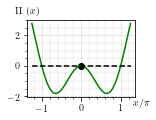

In [154]:
fig, ax = plt.subplots(figsize=(2,1.5))
ax.plot(x / np.pi, y, color="g")
ax.plot(x / np.pi, x*0, linestyle="--", color="k")
ax.scatter([0], [0], color="k")

ax.set_ylabel("$\Pi \ (x)$", rotation=0)
ax.set_xlabel("$x / \pi$")
ax.xaxis.set_label_coords(1.05, -0.025)
ax.yaxis.set_label_coords(0, 1.04)
# ax.tick_params(axis='y', rotation=90)
ax.minorticks_on()
ax.grid(which='major', linestyle=':', linewidth='0.5', color='k', alpha=0.5)
ax.grid(which='minor', linestyle=':', linewidth='0.3', color='k', alpha=0.5)
# plt.legend()
plt.tight_layout(pad=0.1)
plt.savefig("D:\\Kami\\git_folder\\notes_3sem\\HW\\Anal_Mec\\figures\\15_23.pdf")
plt.show()

### 6D

In [334]:
x, y, z, t, g, k, r0 = sp.symbols("x y z t g k r_0")
l, m1, m2, k, alpha0 = sp.symbols("l m_1 m_2 k \\alpha_0")

In [335]:
phi = Function("\\varphi")(t)
theta = Function("\\theta")(t)

In [336]:
x2 = l * sin(phi) / cos(theta + phi)
y2 = l * cos(phi) / cos(theta + phi)
v_cm_d2 = diff(x2, t)**2 + diff(y2, t)**2
# v_cm_d2 = sp.simplify(v_cm_d2)

In [337]:
x2

l*sin(\varphi(t))/cos(\theta(t) + \varphi(t))

In [338]:
y2

l*cos(\varphi(t))/cos(\theta(t) + \varphi(t))

In [339]:
v_cm_d2

(l*(Derivative(\theta(t), t) + Derivative(\varphi(t), t))*sin(\theta(t) + \varphi(t))*sin(\varphi(t))/cos(\theta(t) + \varphi(t))**2 + l*cos(\varphi(t))*Derivative(\varphi(t), t)/cos(\theta(t) + \varphi(t)))**2 + (l*(Derivative(\theta(t), t) + Derivative(\varphi(t), t))*sin(\theta(t) + \varphi(t))*cos(\varphi(t))/cos(\theta(t) + \varphi(t))**2 - l*sin(\varphi(t))*Derivative(\varphi(t), t)/cos(\theta(t) + \varphi(t)))**2

In [340]:
T1 = v_cm_d2 * m2 / 2

In [341]:
T2 = m1 * l**2 / 3 / 2 * diff(theta, t)

In [344]:
P = l * cos(theta) / 2 * m1 * g + l * cos(phi) / cos(theta + phi) * m2 * g - \
    k/2*l**2 * (tan(phi+theta) - alpha0)**2

In [345]:
P

g*l*m_1*cos(\theta(t))/2 + g*l*m_2*cos(\varphi(t))/cos(\theta(t) + \varphi(t)) - k*l**2*(-\alpha_0 + tan(\theta(t) + \varphi(t)))**2/2

In [346]:
L = T1 + T2 - P

In [347]:
d_phi = diff(phi, t)
d_theta = diff(theta, t)
# dd_phi = diff(d_phi, t)
# dd_psi = diff(d_psi, t)
# dd_r = diff(d_r, t)
# dd_theta = diff(d_theta, t)

In [348]:
eq1 = diff(diff(L, d_phi), t) - diff(L, phi)
eq2 = diff(diff(L, d_theta), t) - diff(L, theta)

In [349]:
sp.simplify(eq2)

l*(2*\alpha_0*k*l*cos(\theta(t) + \varphi(t))**5*tan(\theta(t) + \varphi(t))**2 + 2*\alpha_0*k*l*cos(\theta(t) + \varphi(t))**5 - g*m_1*sin(\theta(t))*cos(\theta(t) + \varphi(t))**5 + 2*g*m_2*sin(\theta(t) + \varphi(t))*cos(\theta(t) + \varphi(t))**3*cos(\varphi(t)) - 2*k*l*cos(\theta(t) + \varphi(t))**5*tan(\theta(t) + \varphi(t))**3 - 2*k*l*cos(\theta(t) + \varphi(t))**5*tan(\theta(t) + \varphi(t)) + 4*l*m_2*sin(\theta(t) + \varphi(t))**3*sin(\varphi(t))**2*Derivative(\theta(t), t)**2 + 8*l*m_2*sin(\theta(t) + \varphi(t))**3*sin(\varphi(t))**2*Derivative(\theta(t), t)*Derivative(\varphi(t), t) + 4*l*m_2*sin(\theta(t) + \varphi(t))**3*sin(\varphi(t))**2*Derivative(\varphi(t), t)**2 + 4*l*m_2*sin(\theta(t) + \varphi(t))**3*cos(\varphi(t))**2*Derivative(\theta(t), t)**2 + 8*l*m_2*sin(\theta(t) + \varphi(t))**3*cos(\varphi(t))**2*Derivative(\theta(t), t)*Derivative(\varphi(t), t) + 4*l*m_2*sin(\theta(t) + \varphi(t))**3*cos(\varphi(t))**2*Derivative(\varphi(t), t)**2 + 2*l*m_2*sin(\theta

In [350]:
sp.simplify(eq1)

l*(g*m_2*sin(\theta(t) + \varphi(t))*cos(\theta(t) + \varphi(t))**3*cos(\varphi(t)) - g*m_2*sin(\varphi(t))*cos(\theta(t) + \varphi(t))**4 + k*l*(\alpha_0 - tan(\theta(t) + \varphi(t)))*(tan(\theta(t) + \varphi(t))**2 + 1)*cos(\theta(t) + \varphi(t))**5 + l*m_2*(((-2*(Derivative(\theta(t), t) + Derivative(\varphi(t), t))*sin(\varphi(t))*Derivative(\varphi(t), t) + (Derivative(\theta(t), (t, 2)) + Derivative(\varphi(t), (t, 2)))*cos(\varphi(t)))*sin(\theta(t) + \varphi(t))*cos(\theta(t) + \varphi(t)) + 2*(Derivative(\theta(t), t) + Derivative(\varphi(t), t))**2*sin(\theta(t) + \varphi(t))**2*cos(\varphi(t)) + (-sin(\varphi(t))*Derivative(\varphi(t), (t, 2)) + cos(\varphi(t))*Derivative(\theta(t), t)**2 + 2*cos(\varphi(t))*Derivative(\theta(t), t)*Derivative(\varphi(t), t))*cos(\theta(t) + \varphi(t))**2)*sin(\theta(t)) + ((2*(Derivative(\theta(t), t) + Derivative(\varphi(t), t))*cos(\varphi(t))*Derivative(\varphi(t), t) + (Derivative(\theta(t), (t, 2)) + Derivative(\varphi(t), (t, 2)))*

In [351]:
eq1

g*l*m_2*sin(\theta(t) + \varphi(t))*cos(\varphi(t))/cos(\theta(t) + \varphi(t))**2 - g*l*m_2*sin(\varphi(t))/cos(\theta(t) + \varphi(t)) - k*l**2*(-\alpha_0 + tan(\theta(t) + \varphi(t)))*(2*tan(\theta(t) + \varphi(t))**2 + 2)/2 - m_2*((l*(Derivative(\theta(t), t) + Derivative(\varphi(t), t))*sin(\theta(t) + \varphi(t))*sin(\varphi(t))/cos(\theta(t) + \varphi(t))**2 + l*cos(\varphi(t))*Derivative(\varphi(t), t)/cos(\theta(t) + \varphi(t)))*(4*l*(Derivative(\theta(t), t) + Derivative(\varphi(t), t))*sin(\theta(t) + \varphi(t))**2*sin(\varphi(t))/cos(\theta(t) + \varphi(t))**3 + 2*l*(Derivative(\theta(t), t) + Derivative(\varphi(t), t))*sin(\theta(t) + \varphi(t))*cos(\varphi(t))/cos(\theta(t) + \varphi(t))**2 + 2*l*(Derivative(\theta(t), t) + Derivative(\varphi(t), t))*sin(\varphi(t))/cos(\theta(t) + \varphi(t)) + 2*l*sin(\theta(t) + \varphi(t))*cos(\varphi(t))*Derivative(\varphi(t), t)/cos(\theta(t) + \varphi(t))**2 - 2*l*sin(\varphi(t))*Derivative(\varphi(t), t)/cos(\theta(t) + \varph